In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [2]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [12]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

In [13]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [14]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [15]:
# 미니배치 : 데이터를 적당한 크기로 잘라서 학습
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

# epoch: 학습 데이터 전체를 한바퀴 도는것 
for epoch in range(15):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # mnist.train 이용해 학습
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost =', '{:.3f}'.format(total_cost/total_batch))

print('최적화 완료!')

Epoch: 0001 Avg. cost = 0.409
Epoch: 0002 Avg. cost = 0.147
Epoch: 0003 Avg. cost = 0.097
Epoch: 0004 Avg. cost = 0.067
Epoch: 0005 Avg. cost = 0.052
Epoch: 0006 Avg. cost = 0.039
Epoch: 0007 Avg. cost = 0.030
Epoch: 0008 Avg. cost = 0.024
Epoch: 0009 Avg. cost = 0.021
Epoch: 0010 Avg. cost = 0.019
Epoch: 0011 Avg. cost = 0.013
Epoch: 0012 Avg. cost = 0.013
Epoch: 0013 Avg. cost = 0.013
Epoch: 0014 Avg. cost = 0.013
Epoch: 0015 Avg. cost = 0.010
최적화 완료!


In [16]:
is_correct = tf.equal(tf.argmax(model,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [17]:
# mnist.test 이용해 정확도 계산
print('정확도:', sess.run(accuracy,feed_dict={X: mnist.test.images,Y: mnist.test.labels}))

정확도: 0.98


In [9]:
#####
# 드롭아웃 기법 적용
# tf.nn.dropout()
#####

keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs,Y: batch_ys,keep_prob: 0.8})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

Epoch: 0001 Avg. cost = 0.439
Epoch: 0002 Avg. cost = 0.165
Epoch: 0003 Avg. cost = 0.116
Epoch: 0004 Avg. cost = 0.089
Epoch: 0005 Avg. cost = 0.073
Epoch: 0006 Avg. cost = 0.061
Epoch: 0007 Avg. cost = 0.053
Epoch: 0008 Avg. cost = 0.047
Epoch: 0009 Avg. cost = 0.041
Epoch: 0010 Avg. cost = 0.037
Epoch: 0011 Avg. cost = 0.034
Epoch: 0012 Avg. cost = 0.032
Epoch: 0013 Avg. cost = 0.029
Epoch: 0014 Avg. cost = 0.025
Epoch: 0015 Avg. cost = 0.025
Epoch: 0016 Avg. cost = 0.028
Epoch: 0017 Avg. cost = 0.023
Epoch: 0018 Avg. cost = 0.021
Epoch: 0019 Avg. cost = 0.018
Epoch: 0020 Avg. cost = 0.020
Epoch: 0021 Avg. cost = 0.021
Epoch: 0022 Avg. cost = 0.018
Epoch: 0023 Avg. cost = 0.021
Epoch: 0024 Avg. cost = 0.019
Epoch: 0025 Avg. cost = 0.015
Epoch: 0026 Avg. cost = 0.018
Epoch: 0027 Avg. cost = 0.018
Epoch: 0028 Avg. cost = 0.016
Epoch: 0029 Avg. cost = 0.018
Epoch: 0030 Avg. cost = 0.016
최적화 완료!


In [10]:
# 정확도 높아짐
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,feed_dict={X: mnist.test.images,Y: mnist.test.labels,keep_prob: 1}))

정확도: 0.9838


In [22]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

# 드롭아웃 사용하지 않은 모델 에포크 30번으로 늘림
for epoch in range(30):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost =', '{:.3f}'.format(total_cost/total_batch))

print('최적화 완료!')

# 과적합으로 인해 오히려 정확도 낮아짐
is_correct = tf.equal(tf.argmax(model,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

print('정확도:', sess.run(accuracy,feed_dict={X: mnist.test.images,Y: mnist.test.labels}))

Epoch: 0001 Avg. cost = 0.401
Epoch: 0002 Avg. cost = 0.150
Epoch: 0003 Avg. cost = 0.096
Epoch: 0004 Avg. cost = 0.068
Epoch: 0005 Avg. cost = 0.051
Epoch: 0006 Avg. cost = 0.041
Epoch: 0007 Avg. cost = 0.029
Epoch: 0008 Avg. cost = 0.024
Epoch: 0009 Avg. cost = 0.021
Epoch: 0010 Avg. cost = 0.018
Epoch: 0011 Avg. cost = 0.016
Epoch: 0012 Avg. cost = 0.013
Epoch: 0013 Avg. cost = 0.012
Epoch: 0014 Avg. cost = 0.010
Epoch: 0015 Avg. cost = 0.013
Epoch: 0016 Avg. cost = 0.010
Epoch: 0017 Avg. cost = 0.009
Epoch: 0018 Avg. cost = 0.008
Epoch: 0019 Avg. cost = 0.008
Epoch: 0020 Avg. cost = 0.009
Epoch: 0021 Avg. cost = 0.005
Epoch: 0022 Avg. cost = 0.010
Epoch: 0023 Avg. cost = 0.007
Epoch: 0024 Avg. cost = 0.008
Epoch: 0025 Avg. cost = 0.007
Epoch: 0026 Avg. cost = 0.009
Epoch: 0027 Avg. cost = 0.005
Epoch: 0028 Avg. cost = 0.003
Epoch: 0029 Avg. cost = 0.010
Epoch: 0030 Avg. cost = 0.005
최적화 완료!
정확도: 0.9796


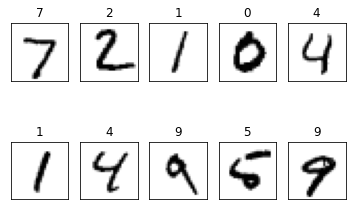

In [26]:
#matplotlib 이용하여 학습결과 손글씨 이미지로 확인
labels = sess.run(model,feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1})

fig = plt.figure()

for i in range(10):
    # 2x5행렬의 i+1번째 칸에 그래프 그리기
    subplot = fig.add_subplot(2, 5, i + 1)
    # x,y 눈금 출력 안함
    subplot.set_xticks([])
    subplot.set_yticks([])
    #가장 높은값 가진 인덱스가 예측 숫자
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28, 28)), cmap=plt.cm.gray_r)

plt.show()